In [50]:
import pandas as pd

df = pd.read_json("foo.jsonl.gz", lines=True)
df.head(3)

,team,submission,libs,runtime,repo,lexical,deep_neural_model,sparse_neural_model,dense_neural_model,single_stage_retrieval,repo_is_public
0,clef25-long-eval-sci-group-5,SciBERT_LongEVAL,"[faiss, numpy, pytorch, python, transformers]",[],https://github.com/Whiax/AIR-TouchStone,0.0,1.0,0.0,1.0,1.0,False
1,clef25-long-eval-sci-group-5,SciBERT_LongEVAL,"[faiss, numpy, pytorch, python, transformers]",[],https://github.com/Whiax/AIR-TouchStone,0.0,1.0,0.0,1.0,1.0,False
2,clef25-sambs,C3-CE-L12-TestAbs,[Python],[],https://github.com/santiago-ruiz-moreno/Scient...,1.0,1.0,0.0,1.0,0.0,False


In [51]:
# Number of teams

len(df["team"].unique())

23

In [60]:
# Number of submissions

len(df["submission"].unique())

70

In [52]:
# Teams with a repo on github:

len(df[df["repo"].str.contains("github")]["team"].unique())

14

In [53]:
# Teams with a repo on bitbucket:

len(df[df["repo"].str.contains("bitbucket")]["team"].unique())

8

In [54]:
# Teams with public repo:

len(df[df["repo_is_public"]]["team"].unique())

7

In [57]:
# Teams that tracked respource consumptoin:

len(df[df["runtime"].astype(bool)]["team"].unique())

2

In [ ]:
# Runs that tracked respource consumption:

len(df[df["runtime"].astype(bool)]["submission"].unique())

15

In [74]:
team_to_libs = {}

lib_to_name = {"PyTerrier": "python-terrier", "pytorch": "torch", "sqlalchemy": "SQLAlchemy", "org.apache.lucene": "Lucene"}


for _, i in df.iterrows():
    if i["team"] not in team_to_libs:
        team_to_libs[i["team"]] = set()

    for lib in i["libs"]:
        team_to_libs[i["team"]].add(lib_to_name.get(lib, lib))

lib_counts = []

NON_LIBS = set(["Apache", "Python", "Java", "os"])

for v in team_to_libs.values():
    for k in v:
        if k in NON_LIBS:
            continue
        lib_counts.append({"lib": k})

lib_counts = pd.DataFrame(lib_counts)

In [75]:
lib_counts.value_counts().head(10)

lib                 
python-terrier          7
numpy                   4
SQLAlchemy              4
scikit-learn            4
pandas                  4
transformers            3
torch                   3
ir-datasets-longeval    3
Lucene                  3
yaml                    2
Name: count, dtype: int64

In [104]:
paradigms = []
for i, v in [("lexical", "Lexical"), ("deep_neural_model", "Deep Neural"), ("sparse_neural_model", "Sparse"), ("dense_neural_model", "Dense Neural"), ("single_stage_retrieval", "Single Stage")]:
    paradigms.append({"Paradigm": v, "Runs": len([j for j in df[i] if j]) , "Used?": "Yes"})
    paradigms.append({"Paradigm": v, "Runs": len([j for j in df[i] if not j]) , "Used?": "No"})
paradigms = pd.DataFrame(paradigms)
paradigms

,Paradigm,Runs,Used?
0,Lexical,84,Yes
1,Lexical,23,No
2,Deep Neural,60,Yes
3,Deep Neural,47,No
4,Sparse,5,Yes
5,Sparse,102,No
6,Dense Neural,59,Yes
7,Dense Neural,48,No
8,Single Stage,67,Yes
9,Single Stage,40,No


<Axes: xlabel='Paradigm', ylabel='Runs'>

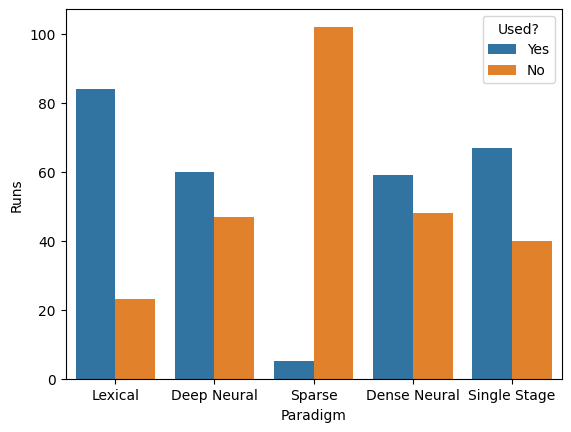

In [105]:
import seaborn as sns

sns.barplot(paradigms, x="Paradigm", y="Runs", hue="Used?")